# Estocolmo

He descargado los archivos de Estocolmo de la situación del 29 de diciembre de 2022.

En este trabajo vamos a hacer un analisis exploratorio de la mayoria de las columnas del dataset de Estocolmo de la siguiente forma:

-Primero analizaremos la distribucion de los barrios de Estocolmo y sus hospedajes

-Luego veremos los tipos de propiedades que ofrece esta ciudad y para que cantidad de personas

-Tambien analizaremos un caso especifico de un anfitrion un poco controversial

-Daremos algunos datos para el turista que quisiera visitar estocolmo

-Por ultimo haremos una mineria de datos a ver que resulta


<br>
<center><img src="http://t1.gstatic.com/licensed-image?q=tbn:ANd9GcTuLVGfMg8-jJj04stBtD2EdQCeQgJdNpCZGVw2QnHCjAJq-KZe9jl0EXwU5DZTzreH"></center>
<br>

Fuente: https://es.dreamstime.com/photos-images/estocolmo.html

# 1. Importando módulos y datos

In [1]:
# Importamos librerias 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from geopy.geocoders import Nominatim

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.io as pio
from plotly.subplots import make_subplots

#text mining
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [2]:
listing = pd.read_csv('listings.csv') #Leemos los datos / Read the data
reviews = pd.read_csv("reviews.csv~/reviews.csv",index_col=['listing_id'],parse_dates=['date'])
listingRW = pd.read_csv("listings.csv~/listingsRW.csv")
calendar = pd.read_csv("calendar.csv/calendar.csv",index_col=['listing_id'],parse_dates=['date'])


In [3]:
listingRW.shape

(3990, 75)

In [4]:
listing.shape

(3990, 18)

# 2. Limpieza y descripción de datos


El conjunto de datos contiene un total de 7 archivos.

listingsRW.csv = Datos detallados de listados

calendar.csv = Datos detallados del calendario

review.csv = Datos de las revisiónes detallados

listing.csv = Resumen de información y métricas para listados en Estocolmo (bueno para visualizaciones).

reviews.csv = Resumen de los datos de revisiones y un listado de ID (para facilitar el análisis basado en el tiempo y las visualizaciones vinculadas a un listado).

neighbourhood.geojson = Archivo GeoJSON de barrios de la ciudad.

El identificador único en el conjunto de datos es la identificación de "listings". Esta es básicamente la identificación del anuncio. 


In [5]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,75590,Amazing nature location by a lake,397766,Peter,NaN,Skarpnäcks,59.30117,18.12833,Entire home/apt,949,30,10,2016-07-08,0.09,1,178,0,NaN
1,109193,Live by the ocean,564237,Lennart,NaN,Östermalms,59.31640,18.16112,Entire home/apt,1800,10,31,2022-07-10,0.24,1,0,1,NaN
2,149587,Modern house 15min from city centre,721536,Teymur,NaN,Rinkeby-Tensta,59.40250,17.98828,Entire home/apt,1966,4,10,2019-08-20,0.08,1,261,0,NaN
3,164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31389,18.06087,Private room,864,3,345,2022-09-13,2.54,2,163,27,NaN
4,170651,Petit Charm Rooftop next to heaven,814021,Marie,NaN,Södermalms,59.31702,18.02946,Entire home/apt,957,4,41,2022-05-30,0.30,1,223,4,NaN


In [6]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3990 entries, 0 to 3989
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3990 non-null   int64  
 1   name                            3988 non-null   object 
 2   host_id                         3990 non-null   int64  
 3   host_name                       3990 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3990 non-null   object 
 6   latitude                        3990 non-null   float64
 7   longitude                       3990 non-null   float64
 8   room_type                       3990 non-null   object 
 9   price                           3990 non-null   int64  
 10  minimum_nights                  3990 non-null   int64  
 11  number_of_reviews               3990 non-null   int64  
 12  last_review                     33

In [7]:
listingRW.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
def comprobar_igualdad_ids(df1, df2):
# 
#     Esta función toma dos dataframes como entradas y verifica si la columna 'id' de ambos dataframes
#     tienen los mismos valores.    
    
#     :Entrada:
#         df1 (DataFrame): Primer DataFrame
#         df2 (DataFrame): Segundo DataFrame
    
#     :Salida:
#         boolean: True si los valores son iguales, False si no lo son.
#     
    # obtener los valores de la columna 'id' de cada DataFrame
    valores_df1 = df1['id'].values
    valores_df2 = df2['id'].values
    
    # comparar los valores
    if np.array_equal(valores_df1, valores_df2):
        return True
    else:
        return False

comprobar_igualdad_ids(listing, listingRW)
# Propiedad intelectual de Roberto

True

In [9]:
listing.set_index("id",inplace=True, drop=True)
listingRW.set_index("id",inplace=True, drop=True)

### Utilizo merge para poder unir los listados en base al id, luego de chequear que contengan la misma informacion

In [10]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate",'host_acceptance_rate', "amenities", "has_availability"]
listings = pd.merge(listing, listingRW[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3990 entries, 75590 to 722105046764233289
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3988 non-null   object 
 1   host_id                         3990 non-null   int64  
 2   host_name                       3990 non-null   object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   3990 non-null   object 
 5   latitude                        3990 non-null   float64
 6   longitude                       3990 non-null   float64
 7   room_type                       3990 non-null   object 
 8   price                           3990 non-null   int64  
 9   minimum_nights                  3990 non-null   int64  
 10  number_of_reviews               3990 non-null   int64  
 11  last_review                     3310 non-null   object 
 12  reviews_per_mont

In [11]:
# Como estan distribuidos los valores nulos / Let see the count of the null values
nulos = listings.isnull().sum()
nulos[nulos>0]


name                              2
neighbourhood_group            3990
last_review                     680
reviews_per_month               680
license                        3990
first_review                    680
review_scores_value             703
review_scores_cleanliness       703
review_scores_location          703
review_scores_accuracy          703
review_scores_communication     703
review_scores_checkin           703
review_scores_rating            680
host_is_superhost                 5
host_about                     1909
host_response_time              947
host_response_rate              947
host_acceptance_rate            529
dtype: int64

In [12]:
# Vemos que porcentaje de nulos tiene cada columna. / I see the percentaje of null values of each column
nulPorcentaje = listings.isnull().sum() * 100 / len(listings)
nulPorcentaje.sort_values(ascending=False)

license                           100.000000
neighbourhood_group               100.000000
host_about                         47.844612
host_response_rate                 23.734336
host_response_time                 23.734336
review_scores_location             17.619048
review_scores_communication        17.619048
review_scores_checkin              17.619048
review_scores_cleanliness          17.619048
review_scores_value                17.619048
review_scores_accuracy             17.619048
last_review                        17.042607
reviews_per_month                  17.042607
review_scores_rating               17.042607
first_review                       17.042607
host_acceptance_rate               13.258145
host_is_superhost                   0.125313
name                                0.050125
listing_url                         0.000000
amenities                           0.000000
maximum_nights                      0.000000
accommodates                        0.000000
host_id   

In [13]:
# Analizamos las columnas de "reviews" / analisis of "reviews" columns
listings["reviews_per_month"].describe()

count    3310.000000
mean        1.190595
std         1.466006
min         0.010000
25%         0.220000
50%         0.610000
75%         1.610000
max        15.220000
Name: reviews_per_month, dtype: float64

In [14]:
listings["last_review"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3990 entries, 75590 to 722105046764233289
Series name: last_review
Non-Null Count  Dtype 
--------------  ----- 
3310 non-null   object
dtypes: object(1)
memory usage: 62.3+ KB


In [15]:
listings["last_review"].value_counts()

2022-09-18    109
2022-09-19     72
2022-08-14     61
2022-09-11     60
2022-09-04     60
             ... 
2019-07-26      1
2021-06-06      1
2018-01-01      1
2022-04-05      1
2022-05-22      1
Name: last_review, Length: 724, dtype: int64

In [16]:
# Eliminamos las columnas license y neighbourhood_group / Drop the columns license and neighbourhood_group
columns_a_eliminar=["license","neighbourhood_group","last_review"]
listings.drop(columns_a_eliminar, axis=1, inplace=True) 

In [17]:
# Con la columna "name" y "host about", coloco "none" como valor/ I fill the column "name" and "host_alone" with "none"
listings.fillna({"name" : "None"}, inplace= True)
listings.fillna({"host_about" : "None"}, inplace = True)

In [18]:
listings["review_scores_value"].describe()

count    3287.000000
mean        4.712747
std         0.371982
min         1.000000
25%         4.610000
50%         4.790000
75%         5.000000
max         5.000000
Name: review_scores_value, dtype: float64

In [19]:
def repair_null(df):
# Repair null values in dataframe using mode if the column is categorical or mean if the column is numerical.
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df


In [20]:
# Repair null values in dataframes
repair_null(listings)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,host_acceptance_rate,amenities,has_availability
id,,,,,,,,,,,,,,,,,,,,,
75590,Amazing nature location by a lake,397766,Peter,Skarpnäcks,59.301170,18.128330,Entire home/apt,949,30,10,...,4.800000,100,https://www.airbnb.com/rooms/75590,f,Easy going and pragmatic when it comes to livi...,a few days or more,0%,0%,"[""Hair dryer"", ""Long term stays allowed"", ""Hea...",t
109193,Live by the ocean,564237,Lennart,Östermalms,59.316400,18.161120,Entire home/apt,1800,10,31,...,4.830000,28,https://www.airbnb.com/rooms/109193,f,I'm a happy guy living in a dream location cal...,within an hour,100%,100%,"[""Hair dryer"", ""Smoke alarm"", ""Refrigerator"", ...",t
149587,Modern house 15min from city centre,721536,Teymur,Rinkeby-Tensta,59.402500,17.988280,Entire home/apt,1966,4,10,...,5.000000,90,https://www.airbnb.com/rooms/149587,f,I am married and have two children.,within an hour,100%,0%,"[""Hair dryer"", ""Dishes and silverware"", ""Long ...",t
164448,Double room in central Stockholm with Wi-Fi,784312,Li,Södermalms,59.313890,18.060870,Private room,864,3,345,...,4.850000,300,https://www.airbnb.com/rooms/164448,t,"I am a recently retired lady, who has two room...",within an hour,100%,100%,"[""Hair dryer"", ""Refrigerator"", ""Bed linens"", ""...",t
170651,Petit Charm Rooftop next to heaven,814021,Marie,Södermalms,59.317020,18.029460,Entire home/apt,957,4,41,...,4.670000,30,https://www.airbnb.com/rooms/170651,f,Im a happy person living with my Cat Louise.\...,within a few hours,80%,33%,"[""Hair dryer"", ""Dishes and silverware"", ""Heati...",t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721566124000300086,Central Co-Living Villa with private bedroom #4,119769216,Otto,Bromma,59.349990,17.919018,Private room,720,1,0,...,4.750619,365,https://www.airbnb.com/rooms/721566124000300086,t,None,within an hour,94%,86%,"[""Long term stays allowed"", ""Free parking on p...",t
721569159308676545,Central Co-Living Villa with private bedroom #5,119769216,Otto,Bromma,59.351926,17.918304,Private room,720,1,0,...,4.750619,365,https://www.airbnb.com/rooms/721569159308676545,t,None,within an hour,94%,86%,"[""Long term stays allowed"", ""Free parking on p...",t
721572995947627810,Central Co-Living Villa with private bedroom #6,119769216,Otto,Bromma,59.350428,17.920177,Private room,720,1,0,...,4.750619,365,https://www.airbnb.com/rooms/721572995947627810,t,None,within an hour,94%,86%,"[""Long term stays allowed"", ""Free parking on p...",t


In [21]:
listings.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
property_type                     0
accommodates                      0
first_review                      0
review_scores_value               0
review_scores_cleanliness         0
review_scores_location            0
review_scores_accuracy            0
review_scores_communication       0
review_scores_checkin             0
review_scores_rating              0
maximum_nights                    0
listing_url                       0
host_is_superhost                 0
host_about                  

In [22]:
#Ahora comprobamos si tiene valores duplicados / Let check if the dataset has duplicate values
listings.duplicated().values.any()

False

In [23]:
#Guardamos una copia en un nuevo csv por seguridad / Save the data 
listings.to_csv(r'DfSinNulls.csv')

In [24]:
#Ahora que tenemos el dataset limpio, procedemos a analizarlo / Now, with the clean dataset, I am going to analyze it
listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,host_acceptance_rate,amenities,has_availability
id,,,,,,,,,,,,,,,,,,,,,
75590,Amazing nature location by a lake,397766,Peter,Skarpnäcks,59.30117,18.12833,Entire home/apt,949,30,10,...,4.80,100,https://www.airbnb.com/rooms/75590,f,Easy going and pragmatic when it comes to livi...,a few days or more,0%,0%,"[""Hair dryer"", ""Long term stays allowed"", ""Hea...",t
109193,Live by the ocean,564237,Lennart,Östermalms,59.31640,18.16112,Entire home/apt,1800,10,31,...,4.83,28,https://www.airbnb.com/rooms/109193,f,I'm a happy guy living in a dream location cal...,within an hour,100%,100%,"[""Hair dryer"", ""Smoke alarm"", ""Refrigerator"", ...",t
149587,Modern house 15min from city centre,721536,Teymur,Rinkeby-Tensta,59.40250,17.98828,Entire home/apt,1966,4,10,...,5.00,90,https://www.airbnb.com/rooms/149587,f,I am married and have two children.,within an hour,100%,0%,"[""Hair dryer"", ""Dishes and silverware"", ""Long ...",t
164448,Double room in central Stockholm with Wi-Fi,784312,Li,Södermalms,59.31389,18.06087,Private room,864,3,345,...,4.85,300,https://www.airbnb.com/rooms/164448,t,"I am a recently retired lady, who has two room...",within an hour,100%,100%,"[""Hair dryer"", ""Refrigerator"", ""Bed linens"", ""...",t
170651,Petit Charm Rooftop next to heaven,814021,Marie,Södermalms,59.31702,18.02946,Entire home/apt,957,4,41,...,4.67,30,https://www.airbnb.com/rooms/170651,f,Im a happy person living with my Cat Louise.\...,within a few hours,80%,33%,"[""Hair dryer"", ""Dishes and silverware"", ""Heati...",t


In [25]:
listings['host_response_rate']

id
75590                   0%
109193                100%
149587                100%
164448                100%
170651                 80%
                      ... 
721566124000300086     94%
721569159308676545     94%
721572995947627810     94%
721643522303509582    100%
722105046764233289    100%
Name: host_response_rate, Length: 3990, dtype: object

In [26]:
# Quitamos el "%" de la columna para luego poder analizarlo
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

In [27]:
# #Empy list of lat and lon to be full

# latitude = [] 
# longitude =  [] 

# #list of countries uniques to add coordinates 

# location = [x for x in listings['neighbourhood'].unique().tolist() if type(x) == str]

# #for each country 
# for i in range(0, len(location)):

#     try: #try to get the coordinates

#         #add the country to the address
#         address = location[i] 

#         #create a geolocator 
#         geolocator = Nominatim(user_agent="ny_explorer")

#         #get the coordinates
#         loc = geolocator.geocode(address)

#         #add the lat and lon to the list
#         latitude.append(loc.latitude)
#         longitude.append(loc.longitude)

#         #print coordinates after add
#         print('The geographical coordinate of location are {}, {}.'.format(loc.latitude, loc.longitude))

#     #if the coordinates are not found

#     except:
#         #add nan to the list
#         latitude.append(np.nan)
#         longitude.append(np.nan)
#     # Propiedad intelectual de demetrio

In [28]:
# #create a dataframe
# df_latlon = pd.DataFrame({'neighbourhood':location, 'neighbourhood_latitude': latitude, 'neighbourhood_longitude':longitude})

In [29]:
# #merge the new df to the old one
# listings = pd.merge(listings,df_latlon, on='neighbourhood', how='left')

In [30]:
# listings['neighbourhood_latitude'].isnull().value_counts()

In [31]:
# listings["neighbourhood"].value_counts()

In [32]:
# listings.loc[listings["neighbourhood"]=="Rinkeby-Tensta",("neighbourhood_latitude","neighbourhood_longitude")]

In [33]:
# listings.fillna({"neighbourhood_latitude" : 59.38920129736526}, inplace= True)
# listings.fillna({"neighbourhood_longitude" : 17.929446774189152}, inplace= True)

# 3. Análisis exploratorio


## 3.1 Las 14 islas

Estocolmo está asentada sobre catorce islas comunicadas por cincuenta puentes entre las aguas del mar Báltico y el lago Mälaren. La geografía de Estocolmo hace posible que la división natural del centro sea en: zona norte, sur, el distrito de Kungsholmen al oeste y la isla de Djurgården, al este.

<br>
<center><img src="https://www.sweetsweden.com/wp-content/uploads/karta_SDF_2.gif"></center>
<br>

In [34]:
listings['neighbourhood'].unique()

array(['Skarpnäcks', 'Östermalms', 'Rinkeby-Tensta', 'Södermalms',
       'Kungsholmens', 'Norrmalms', 'Älvsjö', 'Farsta',
       'Enskede-Årsta-Vantörs', 'Hägersten-Liljeholmens', 'Skärholmens',
       'Bromma', 'Hässelby-Vällingby', 'Spånga-Tensta'], dtype=object)

In [35]:
feq = listing["neighbourhood"].value_counts().sort_values(ascending=True)
fig2 = px.bar(feq, title="Listado de hospedajes por barrio", template = 'plotly_dark',
            color_discrete_sequence=["yellow"],
            labels={'index':'Barrio', 'value':'Cantidad'})
fig2.update_traces(text=((listings["neighbourhood"].value_counts()/listings['neighbourhood'].value_counts().sum()).sort_values(ascending=True))
                    ,texttemplate='%{text:.2%}', textposition='outside',cliponaxis=False)
fig2.update_layout(showlegend=False)
fig2.show()

En este grafico se puede ver que la mayoría de los hospedajes se encuentran en el barrio de "Södermalms”, ya que es donde se encuentra el Gamla Stan y el casco histórico. 

En el siguiente mapa veremos la distribución de los alojamientos y vemos como todos se sitúan en y alrededor de este barrio. 

In [36]:
lats = listings['latitude'].tolist()
lons = listings['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[59.31398644084464, 18.060603727822542], zoom_start=10.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [37]:
# lats = listings['neighbourhood_latitude'].unique().tolist()
# lons = listings['neighbourhood_longitude'].unique().tolist()
# locations = list(zip(lats, lons))

# map1 = folium.Map(location=[59.31398644084464, 18.060603727822542], zoom_start=11)
# FastMarkerCluster(data=locations).add_to(map1)
# map1

In [38]:
listings['neighbourhood'].value_counts().head()

Södermalms      972
Östermalms      430
Norrmalms       366
Kungsholmens    341
Bromma          322
Name: neighbourhood, dtype: int64

## 3.2 Tipos de propiedades y habitaciones

### 3.2.1 Tipos de habitaciones

En el siguiente grafico podemos ver los tipos de habitaciones que hay en Estocolmo.

In [39]:
listings["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [40]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
fig2 = px.bar(freq, title="Tipos de habitaciones", template = 'plotly_dark',
                color_discrete_sequence=["yellow"],
                labels={'index':'Habitaciones', 'value':'Cantidad'})
fig2.update_traces(text=((listings["room_type"].value_counts()/listings['room_type'].value_counts().sum()).sort_values(ascending=True))
                    ,texttemplate='%{text:.2%}', textposition='outside',cliponaxis=False)
fig2.update_layout(showlegend=False)
fig2.show()

Curiosamente la mayoría son casas o apartamentos enteros. Esto podría ser una limitación si alguien quisiera viajar solo.

### 3.2.2 Tipos de propiedades

En el conjunto de datos, encontramos muchos tipos de propiedades diferentes.

In [41]:
listings["property_type"].unique()

array(['Entire rental unit', 'Entire home', 'Private room in rental unit',
       'Entire condo', 'Shared room in rental unit',
       'Private room in home', 'Private room in loft', 'Entire townhouse',
       'Private room in townhouse', 'Entire villa',
       'Shared room in villa', 'Entire loft', 'Entire cabin',
       'Private room in condo', 'Entire guesthouse',
       'Private room in guest suite', 'Private room in villa',
       'Private room in bed and breakfast', 'Private room in guesthouse',
       'Private room in houseboat', 'Room in aparthotel',
       'Entire serviced apartment', 'Entire cottage', 'Tiny home',
       'Entire guest suite', 'Shared room in hostel', 'Room in hotel',
       'Shared room in home', 'Farm stay', 'Camper/RV', 'Entire bungalow',
       'Room in boutique hotel', 'Room in bed and breakfast',
       'Room in serviced apartment', 'Entire vacation home',
       'Private room in serviced apartment', 'Private room in hostel',
       'Shared room in cabin

In [42]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=50]
prop = prop.drop(columns=['total'])

fig4= px.bar(prop,title="Tipos de propiedad en Estocolmo", template = 'plotly_dark',
        color_discrete_sequence=["yellow","#7D6608","blue","#17202A"],
        labels={'index':'propiedades', 'value':'cantidad'} )
fig4.show()


Como vemos la mayoría son unidades enteras, y habitaciones privadas. Lo que llama la atención es que hay muy pocas habitaciones compartidas

## 3.3 Número de alojados

In [43]:
feq2=listings['accommodates'].value_counts().sort_index()

In [44]:
fig2 = px.bar(feq2, title="Cantidad de personas", template = 'plotly_dark',
                color_discrete_sequence=["yellow"],
                labels={'index':'N° de Personas', 'value':'Cantidad'})
fig2.update_traces(text=((feq2/listings['accommodates'].value_counts().sum()))
                    ,texttemplate='%{text:.2%}', textposition='outside',cliponaxis=False)
fig2.update_layout(showlegend=False)
fig2.show()

Como era de esperar, la mayoría de los listados son para 2 personas. 

Además, Airbnb utiliza un máximo de 16 huéspedes por anuncio, que vemos que no se supera.

# 4. El caso Hedvig

Según el artículo https://escandinavia24.com/2020/10/18/por-que-airbnb-no-ha-triunfado-en-suecia/ Martin Hofverberg, responsable de economía del sindicato de inquilinos Hyresgästföreningen dice que, «en Suecia no existe la posibilidad, por contrato, de que un particular, que sin ser empresa posea más de un apartamento, y por tanto es inviable la figura del «gran arrendador» que sí se da en el resto de Europa».

Veremos si lo que dice Martin es real.

In [45]:
narr = listings["host_name"].value_counts()
narr2 = narr[narr>25]

In [46]:
fig7 = px.bar(narr2, title="Personas con mas de 25 alojamientos", template = 'plotly_dark',
                color_discrete_sequence=["yellow"],
                labels={'index':'Nombre de las Personas', 'value':'Cantidad de alojamientos'})
fig7.update_layout(showlegend=False)
fig7.add_annotation( # add a text callout with arrow
    text="74 Alojamientos!", x="Hedvig", y=80, arrowhead=1, showarrow=True)
fig7.show()

Como vemos, Hedvig, tiene 74 alojamientos listados en Airbnb y Anna otros 69.

En principio, veamos si es la misma persona o no. Para eso, filtramos para ver si los alojamientos tienen el mismo ID o no.

In [47]:
listings.loc[listings["host_name"]=="Hedvig","host_id"].value_counts()

22876006    73
23105224     1
Name: host_id, dtype: int64

In [48]:
listings.loc[listings["host_name"]=="Anna","host_id"].value_counts()

14955676     2
11141166     2
365107413    1
23201563     1
1389492      1
            ..
24197319     1
172668325    1
149107990    1
193202464    1
402182405    1
Name: host_id, Length: 67, dtype: int64

Descartamos a Anna como una posible "Gran arrendadora" pero vemos que hedvig tiene 73 alojamientos con el mismo ID.

Ahora filtramos ese ID a ver a que conclusión llegamos:

In [49]:
listings.loc[listings["host_id"]==22876006,"neighbourhood"].value_counts()

Södermalms                44
Östermalms                11
Norrmalms                  8
Enskede-Årsta-Vantörs      6
Kungsholmens               3
Hägersten-Liljeholmens     1
Name: neighbourhood, dtype: int64

Hedvig tiene propiedades en 6 barrios diferentes

### Según su descripción

Born and raised in Stockholm and work as a professional co-host. Me or my colleagues at Hostini will do our outmost to ensure that you have a lovely stay here in Stockholm and I am happy to share my personal favorites on what to do and see in this beautiful city!

Vemos en su descripción que dice que es un co-host y nombra a "Hostini". Según su propia página web https://www.hostini.se/, Hostini es una inmobiliaria ubicada en Estocolmo que ofrece servicios de alquiler.

Entonces, Hedvig estaría representando a una empresa, por lo que no estaría incumpliendo ninguna ley.

Lo que me parece interesante es que no coloca el nombre de la empresa en el Host sino el suyo propio. 

Ya que no pude encontrar nada que indique que eso sea ilegal, podemos decir que Martin, en este caso, tenía razón.


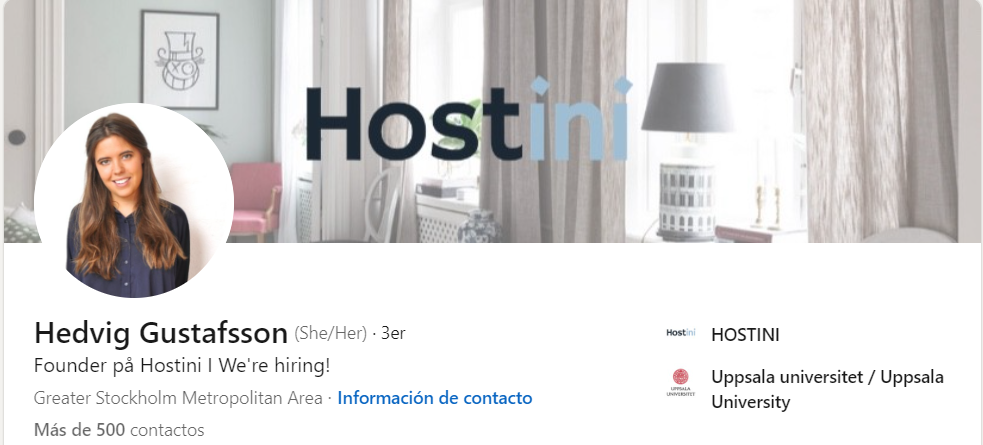

Fuente : https://www.linkedin.com/

# 5. Precios y reviews

Alojarse en Estocolmo sin gastar mucho es complicado. La capital de Suecia es una de las ciudades más caras de Europa para encontrar alojamiento.
En este apartado intentaremos dar la información suficiente para poder encontrar hospedajes de buena calidad y a un buen precio.


## 5.1 Precio medio por barrio

Ya que la mayoría de los hospedajes ofrecían alojamiento para 2 personas, me pareció razonable ver el precio medio por barrio para esta cantidad

In [50]:
feq3 = listings[listings['accommodates']==2]
feq3 = feq3.groupby('neighbourhood')["price"].mean().sort_values(ascending=False)
feq3 = round(feq3,2)

In [97]:
fig8 = px.funnel(feq3, title="Precio medio del alojamiento para 2 personas", template = 'plotly_dark',
                color_discrete_sequence=["blue"],
                labels={'index':'Barrio', 'value':'Precio medio'})
fig8.update_layout(showlegend=False)
fig8.show()

Curiosamente, "Södermalms", el barrio con más alojamientos, no es el más caro de todos.

Más allá de eso, los barrios más céntricos son los más caros.


In [52]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

In [53]:
adam = gpd.read_file("neighbourhoods.geojson")

In [54]:
feq = pd.DataFrame([feq])

In [55]:
feq = feq.transpose()

In [56]:
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)


In [57]:
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)
map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','blue'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[59.31398644084464, 18.060603727822542], zoom_start=10.4)
folium.GeoJson(data=adam,
               name='Stockholm',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

## 5.2 Analisis de las reviews

En esta parte, agrupamos los puntajes de revisión de la ubicación por barrio. 

Algunos factores que deberían influir a la hora de analizar estas reviews:

* Ubicación: Si un alojamiento está ubicado fuera del centro de la ciudad, pero bien conectado por transporte público, debería obtener puntos de bonificación por eso.
* Instalaciones cercanas al listado. ¿Hay supermercados, bares y restaurantes cerca?
* Distancia: No solo al centro de la ciudad, sino a los lugares icónicos de Estocolmo que no están en el centro. 
* Ruido: Si una lista tiene una ubicación central, pero está rodeada de bares ruidosos, eso debería restar puntos en la revisión de la ubicación.

Todo esto depende de lo que se busque en el viaje, ya que si uno busca vida nocturna quizás valore más estar cerca de bares, y quizás otra persona valore estar más alejado de la ciudad y disfrutar más la naturaleza. 

Por eso, creemos coherente tomar los hospedajes que tengan al menos 30 revisiones, para no distorsionar los resultados.



In [58]:
max30 = listings[listings['number_of_reviews']>=30]
reviewLocat = max30.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ac2 = listings[listings['accommodates']==2]
priceNeig = ac2.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

In [59]:
figures = [
            px.bar(reviewLocat, color_discrete_sequence=["yellow"]),
            px.bar(priceNeig)
    ]

In [60]:
pio.templates.default = "plotly_dark"
fig9 = make_subplots(rows=1, cols=2,
                     subplot_titles= ("Media de las puntuaciones (Al menos 30)",
                                     "Media de precios por barrio"))
                                    # column_widths=[0.5, 0.5], row_heights=[700])

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig9.append_trace(figure["data"][trace], row=1, col=i+1)
fig9.update_layout(showlegend=False)
fig9.show()

A priori, vemos en el grafico que los barrios más céntricos y más caros, son los que reciben mejores puntuaciones.

Algunos datos a tener en cuenta es que la extensión territorial de Estocolmo es de 188 km², por lo que los barrios en general están relativamente cerca del centro de la ciudad, por eso podemos ver que no hay una gran variación en los puntajes de ubicación. Además, todos los barrios están bien conectados por metro, tranvía y autobuses. 

En el grafico también se puede ver que una de las mejores opciones (Aunque no la más barata), sería el barrio de "Södermalms", ya que, como vimos anteriormente, tiene la mayor cantidad de alojamientos. Pero con esta nueva información, vemos además que tiene las mejores puntuaciones de ubicación, llegando casi a una media de 4,91.

Por otro lado, vemos que la mayoría de los barrios tienen una puntuación media de ubicación por encima de 4,62. 

Con esta información y en base a la ubicación, podríamos decir que cualquier barrio de Estocolmo sería una buena elección.

Pero... ¿Realmente es una buena elección? Para eso, veremos los demás puntajes a ver a que conclusión llegamos.


In [61]:
# figures2 = [
#             px.line_polar(listings, r =Srl, theta= revie, line_close=True, title="Södermalms"),
#             px.line_polar(listings, r =nor, theta= revie, line_close=True, title="Norrmalms"),
#             px.line_polar(listings, r =ost, theta= revie, line_close=True, title="Östermalms"),
#             px.line_polar(listings, r =kun, theta= revie, line_close=True, title="Kungsholmens"),
#             px.line_polar(listings, r =bro, theta= revie, line_close=True, title="Bromma"),
#             px.line_polar(listings, r =han, theta= revie, line_close=True, title="Hägersten-Liljeholmens"),
#             px.line_polar(listings, r =ska, theta= revie, line_close=True, title="Skarpnäcks"),
#             px.line_polar(listings, r =alv, theta= revie, line_close=True, title="Älvsjö"),
#             px.line_polar(listings, r =ens, theta= revie, line_close=True, title="Enskede-Årsta-Vantörs"),
#             px.line_polar(listings, r =rin, theta= revie, line_close=True, title="Rinkeby-Tensta"),
#             px.line_polar(listings, r =far, theta= revie, line_close=True, title="Farsta"),
#             px.line_polar(listings, r =skar, theta= revie, line_close=True, title="Skärholmens"),
#             px.line_polar(listings, r =has, theta= revie, line_close=True, title="Hässelby-Vällingby"),
#             px.line_polar(listings, r =spa, theta= revie, line_close=True, title="Spånga-Tensta"),
#     ]

## 5.3 Puntuaciones generales y por barrio


Además de las evaluaciones, las valoraciones en estrellas son una manera muy rápida de conocer la opinión de los huéspedes. Para calcular la media de cada anuncio, se pide que valoren su estancia en función de las categorías que te explicamos aquí debajo.

- Experiencia en general. ¿Qué tal fue la estancia?
- Limpieza. ¿El alojamiento cumplía nuestros estándares?
- Veracidad. ¿Las fotos y la descripción estaban actualizados y eran fieles a la realidad?
- Llegada. ¿Fue un proceso sencillo y llevadero?
- Comunicación. ¿El anfitrión respondió pronto a los mensajes?
- Ubicación. ¿El huésped conocía la información más importante sobre seguridad, transporte, zonas de interés y otras particularidades de la zona que pudiesen afectar a su estancia, como las normas sobre ruidos?
- Calidad. ¿La relación calidad-precio era buena?
- Servicios. ¿Todo lo prometido en el anuncio estaba disponible y en buenas condiciones?

De los últimos 2 no tenemos datos, pero a continuación veremos la distribución de puntajes del resto de categorías.

In [62]:
listings10 = listings[listings['number_of_reviews']>=30]
rev=listings10['review_scores_location'].value_counts().head(50).sort_index()
clean=listings10['review_scores_cleanliness'].value_counts().head(50).sort_index()
acur=listings10['review_scores_accuracy'].value_counts().head(50).sort_index()
comu=listings10['review_scores_communication'].value_counts().head(50).sort_index()
check=listings10['review_scores_checkin'].value_counts().head(50).sort_index()
value=listings10['review_scores_value'].value_counts().head(70).sort_index()

In [63]:
figures = [
            px.bar(rev, color_discrete_sequence=["yellow"]),
            px.bar(clean, color_discrete_sequence=["blue"]),
            px.bar(acur, color_discrete_sequence=["yellow"]),
            px.bar(comu, color_discrete_sequence=["blue"]),
            px.bar(check, color_discrete_sequence=["yellow"]),
            px.bar(value, color_discrete_sequence=["blue"])
    ]

In [64]:
fig9 = make_subplots(rows=len(figures), cols=1,
                     subplot_titles= ("Ubicacion","Limpieza", "Veracidad","Comunicación","Llegada","Experiencia Gral")) 
                    #  row_heights= [5500,3500,3500,3500,3500,3500])

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig9.append_trace(figure["data"][trace], row=i+1, col=1)

fig9.update_layout(showlegend=False,height=1100, width=1100)
fig9.show()

Increíblemente podemos ver como la mayoría de los puntajes están entre el 4.5 y el 5.

¿Y será así para todos los barrios? Vamos a verlo a continuación...

In [65]:
revie = ('review_scores_location',"review_scores_cleanliness","review_scores_accuracy","review_scores_communication","review_scores_checkin","review_scores_value")
Srl = listings.loc[listings["neighbourhood"]=="Södermalms",revie].mean()
nor = listings.loc[listings["neighbourhood"]=="Norrmalms",revie].mean()
ost = listings.loc[listings["neighbourhood"]=="Östermalms",revie].mean()
kun = listings.loc[listings["neighbourhood"]=="Kungsholmens",revie].mean()
bro = listings.loc[listings["neighbourhood"]=="Bromma",revie].mean()
han = listings.loc[listings["neighbourhood"]=="Hägersten-Liljeholmens",revie].mean()
ska = listings.loc[listings["neighbourhood"]=="Skarpnäcks",revie].mean()
alv = listings.loc[listings["neighbourhood"]=="Älvsjö",revie].mean()
ens = listings.loc[listings["neighbourhood"]=="Enskede-Årsta-Vantörs",revie].mean()
rin = listings.loc[listings["neighbourhood"]=="Rinkeby-Tensta",revie].mean()
far = listings.loc[listings["neighbourhood"]=="Farsta",revie].mean()
skar = listings.loc[listings["neighbourhood"]=="Skärholmens",revie].mean()
has = listings.loc[listings["neighbourhood"]=="Hässelby-Vällingby",revie].mean()
spa = listings.loc[listings["neighbourhood"]=="Spånga-Tensta",revie].mean()

In [66]:
revie2 = (('Ubicación',"Limpieza","Veracidad","Comunicacion","Llegada","Exp. Gral"))

In [67]:
fig = make_subplots(rows=4, cols=2, specs=[[{"type": "polar"},{"type": "polar"}],
                                            [{"type": "polar"},{"type": "polar"}],
                                            [{"type": "polar"},{"type": "polar"}],
                                            [{"type": "polar"},{"type": "polar"}]]
                    ,subplot_titles=("Södermalms","Norrmalms","Östermalms","Kungsholmens","Bromma","Hägersten-Liljeholmens"
                                    ,"Hässelby-Vällingby","Spånga-Tensta"))
fig.add_trace(go.Barpolar(theta=revie2, r=Srl,   
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=1, col=1)
fig.add_trace(go.Barpolar(theta=revie2, r=nor, 
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=1, col=2)
fig.add_trace(go.Barpolar(theta=revie2, r=ost, 
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=2, col=1)
fig.add_trace(go.Barpolar(theta=revie2, r=kun, 
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=2, col=2)
fig.add_trace(go.Barpolar(theta=revie2, r=bro, 
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=3, col=1)
fig.add_trace(go.Barpolar(theta=revie2, r=han, 
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=3, col=2)
fig.add_trace(go.Barpolar(theta=revie2, r=has, 
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=4, col=1)
fig.add_trace(go.Barpolar(theta=revie2, r=spa, 
    marker_color=["#FFFF00", '#709BFF', '#709BFF', '#0000FF', '#0000FF', '#FFFF00'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8),
              row=4, col=2)
fig.update_layout(height =1500 ,showlegend=False)

fig.show()

Aquí tenemos 8 de los barrios más representativos, y por lo que vemos, no varía mucho su puntuación.

Veamos como están los barrios con respecto al rating total

In [68]:
scores = listings.groupby("neighbourhood")["review_scores_rating"].mean().sort_values()

In [69]:
fig222 = px.bar(scores, title="Listado de rating por barrio", 
            template = 'plotly_dark',
            color_discrete_sequence=["yellow"],
            labels={'neighbourhood':'Barrio', 'value':'Puntaje'})

fig222.update_layout(showlegend=False)
fig222.show()

La variación entre el mejor puntaje y el peor es de 0.05.

Entonces, ¿Podemos confiar en estos valores?

Según el siguiente artículo "Por qué nos cuesta tanto poner valoraciones negativas en Airbnb"[https://theconversation.com/por-que-nos-cuesta-tanto-poner-valoraciones-negativas-en-airbnb-132529#:~:text=En%20general%2C%20la%20mayor%C3%ADa%20de,escala%20de%201%20a%205], deberíamos ahondar sobre la categoría de "Superhost" que da Airbnb en la cual, además de las buenas valoraciones, deben cumplir con otras variables para poder serlo.


## 5.4 ¿Que es un SuperHost?

Superhost (cuya traducción del inglés significa “Súper anfitrión”) es una categoría de Airbnb que destaca a los anfitriones más experimentados, hospitalarios y mejor valorados. Estos anfitriones reciben un distintivo especial en su anuncio y su perfil que les otorga una mayor visibilidad en la plataforma.

¿Cómo ser Superhost en Airbnb?
Debes cumplir los siguientes requisitos:

- Valoración media de 4,8 (o superior)
- Un mínimo de 10 estancias completadas
- Ratio de cancelación inferior al 1%
- Ratio de respuesta del 90%

No obstante, si se cumplen estos criterios, el anfitrión aumentará enormemente su visibilidad en la plataforma.

A continuación, veremos qué datos tenemos sobre los superhost en Estocolmo

In [70]:
listings.host_is_superhost = listings.host_is_superhost.replace({"t": "True", "f": "False"})

superH=listings['host_is_superhost'].value_counts()
fig2 = px.bar(superH, title="Cantidad de Superhost", color_discrete_sequence=["yellow"],
                 labels={'index':'', 'value':'Cantidad'})
fig2.update_traces(text=((superH/listings['host_is_superhost'].value_counts().sum()))
                    ,texttemplate='%{text:.2%}', textposition='inside',cliponaxis=False)
fig2.update_layout(showlegend=False)
fig2.show()

Solo el 15% de los anfitriones en Estocolmo son Superhost. Por ende, sería razonable buscar un superhost para alojarse. Aunque habría que ver si este es más caro o no...

In [71]:
superHh = listings.loc[listings["host_is_superhost"]=="True","price"]
resto= listings.loc[listings["host_is_superhost"]=="False","price"]

In [72]:
figures = [
            px.box(superHh, color_discrete_sequence=["yellow"]),
            px.box(resto, color_discrete_sequence=["blue"])
    ]

In [73]:
fig10 = make_subplots(rows=1, cols=2,
                     subplot_titles= ("Precios de Superhost",
                                     "Precios de los no Superhost"),
                     x_title= "Cantidad",
                     y_title= "Precio")

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig10.append_trace(figure["data"][trace], row=1, col=i+1)
fig10.update_layout(showlegend=False)
fig10.show()

Los superhost no son más caros que el resto, como vemos, la mediana de los valores de los superhost es de 991 contra una mediana del resto de host de 1025. 

Por eso, recomendamos que busques un superhost a la hora de hospedarte en Estocolmo, ya que pagaras una suma similar, pero te aseguraras una buena estadía.

## 5.5 Disponibilidad en el tiempo


El archivo de calendario contiene 365 registros para cada listado, lo que significa que, para cada listado, el precio y la disponibilidad por fecha se especifican con 365 días de anticipación.

In [74]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))


In [75]:
calendar = calendar[calendar.date < '2023-09-23']

In [76]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")

In [77]:
calendar.head()

,date,available,price,adjusted_price,minimum_nights,maximum_nights,accommodates
listing_id,,,,,,,
75590,2022-09-24,f,949.0,$949.00,30,100,3
75590,2022-09-25,f,949.0,$949.00,30,100,3
75590,2022-09-26,t,949.0,$949.00,30,100,3
75590,2022-09-27,t,949.0,$949.00,30,100,3
75590,2022-09-28,t,949.0,$949.00,30,100,3


In [78]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')


In [79]:
fig20 = px.line(sum_available, y = "available",title = 'Cantidad de alojamientos disponibles por fecha', 
                        labels={'date':'Fecha', 'available':'Cantidad de alojamientos disponibles'} )
fig20.update_xaxes(ticks= "outside",
                 ticklabelmode= "period", 
                 tickcolor= "black", 
                 ticklen=10, 
                )
fig20.show()


En principio podemos ver como a partir de que nos "alejamos” de la fecha actual, aumenta la cantidad de alojamientos disponibles.

Por otro lado, vemos una leve caída del 23 al 1 de enero (Claramente por las fiestas), luego vemos un aumento hasta el 22 de marzo donde hay una caída y luego se mantiene la disponibilidad.

Entiendo que, a partir de finales de marzo y principio de abril, los días en Estocolmo comienzan a ser mejores y sube la temperatura.

## 5.6 Precio medio por día


A continuación, verá el precio promedio de todos los alojamientos para 2 personas marcados como disponibles por fecha.

In [80]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

In [81]:
fig21 = px.line(average_price, y = "price",title = 'Precio medio de los alojamientos disponibles por fecha para 2 personas', 
                        labels={'date':'Fecha', 'price':'Precio'})

fig21.update_layout(xaxis_range=['2023-01-23','2023-09-23'])
fig21.show()

El precio medio es entre 1000 y 1100, aumentando levemente en fechas más lejanas. Con un patrón cíclico que se debe a precios más altos en los fines de semana.

# 6. Minería de texto

En esta parte veremos las palabras más utilizadas en los comentarios de Estocolmo.

In [82]:
reviews.shape

(97698, 5)

In [83]:
reviews = pd.merge(reviews, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")

In [84]:
reviews = reviews.set_index('id')

In [85]:
reviews = reviews[['name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews.head()

,name,host_id,host_name,date,reviewer_id,reviewer_name,comments
id,,,,,,,
6178417,Amazing nature location by a lake,397766,Peter,2013-08-02,7149244,Len,This apartment was stunning. `Everything about...
6353035,Amazing nature location by a lake,397766,Peter,2013-08-09,7317470,Lorenz,what a nice appartement! just missed a small p...
6536468,Amazing nature location by a lake,397766,Peter,2013-08-16,7171084,Claire,"The apartment is bright, welcoming and ideally..."
6636724,Amazing nature location by a lake,397766,Peter,2013-08-19,2319031,Thang,The apartment was brilliant from the moment of...
6872973,Amazing nature location by a lake,397766,Peter,2013-08-28,7651118,Vadim,"We've had a great time in Stockholm, and it wa..."


Aquí podemos ver los 5 host con mas reviews y vemos que aparece nuestro amiga Hedvig

In [86]:
host_reviews = reviews.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

,,number_of_reviews
host_id,host_name,
8098890,Robin,2853
22876006,Hedvig,2850
60382478,Elias,2649
1027549,William,2442
362541894,ApartDirect,1824


In [87]:
reviews.comments.values[2] #print comment with numbers and windows line break

'The apartment is bright, welcoming and ideally located, a few steps by a bus stop that lead you to the city centre in about 10 minutes. The balcony is a real plus, where we could relax and enjoy the view every evening. The lake and the surroundings were great and exactly fit what you can expect about Swedish nature.\r<br/>Peter was extremely friendly and helpful. He found a baby bed when we asked.\r<br/>Every time we had a question, not only Peter answered quickly but he also gave us every useful information that made our stay in Stockholm even better. \r<br/>'

In [88]:
#take out empty comments (530)
reviews = reviews[reviews['comments'].notnull()]

In [89]:
#remove numbers
reviews['comments'] = reviews['comments'].str.replace('\d+', '') 
#all to lowercase
reviews['comments'] = reviews['comments'].str.lower()
#remove windows new line
reviews['comments'] = reviews['comments'].str.replace('\r\n', "")

In [90]:
# remove br
reviews['comments'] = reviews['comments'].str.replace('br', "")

In [91]:
import nltk

In [92]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Romina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews['comments'] = reviews['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews['comments'] = reviews['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews['comments'] = reviews['comments'].str.replace('\s+', ' ')

reviews.comments.values[2] #print same comments again

'apartment ight welcoming ideally located steps bus stop lead city centre minutes balcony real plus could relax enjoy view every evening lake surroundings great exactly fit expect swedish nature peter extremely friendly helpful found baby bed asked every time question peter answered quickly also gave us every useful information made stay stockholm even better '

In [94]:
texts = reviews["comments"].tolist()

In [95]:
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
0,apartment,36650
96,great,36272
74,place,32317
117,stay,31311
11,stockholm,28939
7,location,26898
49,nice,25670
124,clean,20806
147,host,19222
161,recommend,16162


Aqui podemos ver las palabras mas utilizadas en los comentarios de los alojamientos

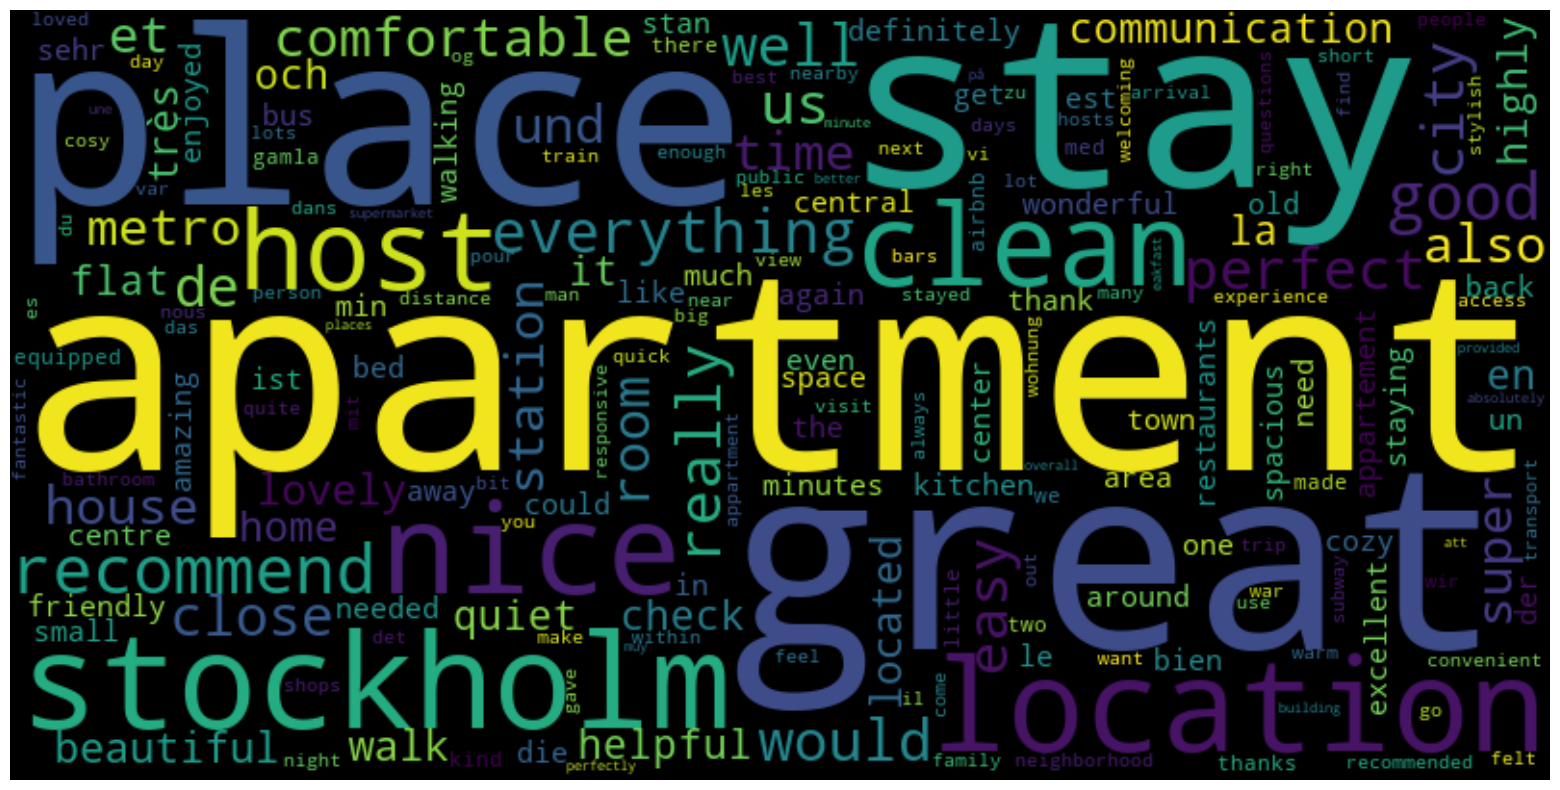

In [96]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 7. Consejos finales

-	Estocolmo es una ciudad muy cara, aunque busques los barrios más lejanos.
-	Si no tienes mucho tiempo de planificar tu viaje, yo buscaría alojamientos en “Södermalms”, ya que es el barrio con más alojamientos listados.
-	Si viajas solo y quieres buscar una habitación compartida para ahorrar, te diría que planifiques con tiempo tu viaje, o no busques en Airbnb ya que no hay muchas en Estocolmo
-	Es conveniente viajar de a 2 o de a 4, ya que tienes muchas más posibilidades de alojamiento
-	Si vas a guiarte por las reviews, ten en cuenta que una diferencia de 0.10 en los puntajes es bastante más de lo que parece.
-	Hay pocos superhost en Estocolmo, pero si puedes alquilarle a alguno de ellos, te lo recomiendo, ya que, en su generalidad, no son más caros que los demás.
-	Si puedes, no alquiles en fin de semana


Por último, si tienes alguna duda, le puedes consultar a Hedvig que te asesorara sin problema.


<br>
<center><img src="https://i.imgur.com/oIcm8fC.jpeg"></center>
<br>